# Seminar - strategija u igrama na sreću, Luka Šimek PMFMO Zagreb

## Uvod

Vrlo zanimljivi dio Pythona, kao i programiranja općenito, uvijek su mi bile pseudoslučajne funkcije odnosno brojevi. Pomoću njih možemo, primjerice, simulirati bacanje kocke. Pritom je velika prednost nad stvarnim bacanjem ta da se može izvršiti vrlo brzo, a stoga i veliki broj puta.

In [155]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
%matplotlib notebook
import scipy.stats as stats

Za početak možemo napisati funkciju koja računa aritmetičku sredinu $N$ bacanja kocke. Jaki zakon velikih brojeva jamči da će gotovo sigurno limes parcijalnih aritmetičkih sredina jednak matematičkom očekivanju, tj. 
$\underset{n}{\lim} \bar{X}_n = \mathbb{E} X_1$ ako je $X_i$ slučajna varijabla koja odgovara $i$-tom bacanju kocke. Lako izračunamo da je $\mathbb{E}X_1 = 7/2$. S većim brojem bacanja intuitivno očekujemo veću preciznost, odnosno manju razliku tzv. empirijskog i teoretskog očekivanja.

In [32]:
def ars (N):
    suma = 0
    for i in range(N):
        suma += np.random.randint(1,7)
    print(suma/N)

In [35]:
ars(10)
ars(100000)

4.1
3.50487


Možemo i pratiti parcijalne aritmetičke sredine i promatrati njihovo ponašanje kako se $n$ povećava od $1$ do $N$.

In [117]:
def parcars (N):
    x = list(range(N+1))
    L = [None] * (N+1)
    L[0] = np.random.randint(1,7)
    for i in range(1,N):
        L[i] = (L[i-1] * i + np.random.randint(1,7)) / (i+1)
    
    plt.plot(x, L, color = 'black')
    plt.plot(x, [3.5] * (N+1), color = 'red')

<IPython.core.display.Javascript object>


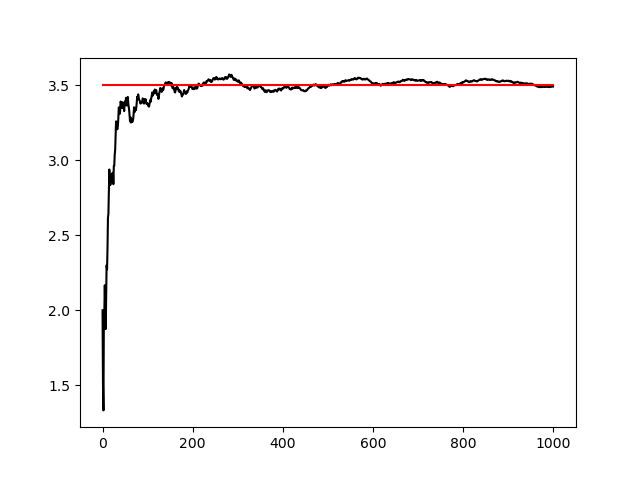

In [120]:
parcars(1000)

Alternativno, možemo napraviti animirani graf koji se nastavlja nadopunjavati proizvoljno dugo, služeći se [1] i [2].

<IPython.core.display.Javascript object>


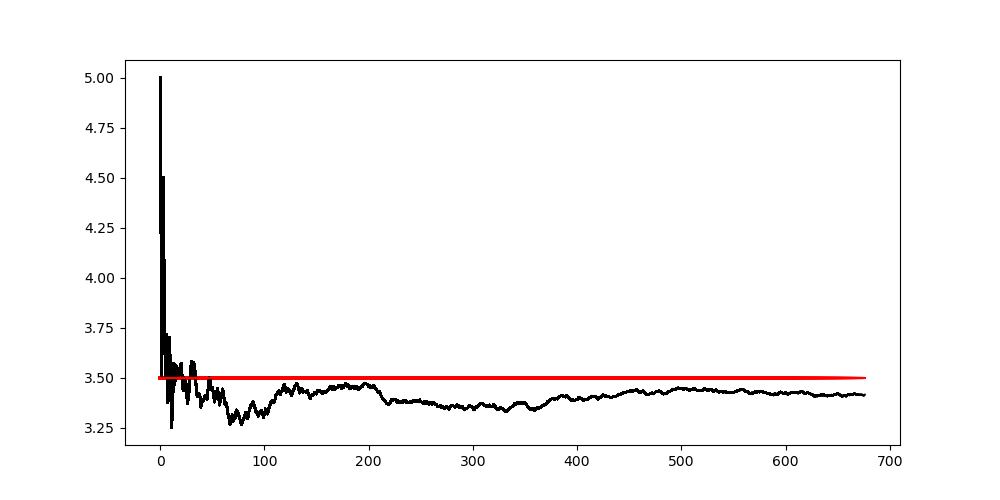

In [152]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

x = [0]
L = [np.random.randint(1,7)]
y = [3.5]

def parcars_anim(i):
    i += 1
    L.append((L[-1] * i + np.random.randint(1,7)) / (i+1))
    x.append(i)
    y.append(3.5)
    
    axes.plot(x, L, color='black')
    axes.plot(x, y, color = 'red')

ani = animation.FuncAnimation(fig, parcars_anim, interval = 10, blit = True)
plt.show()

To da očekujemo manje razlike do očekivanja za veće $n$ upravo je ekvivalentno tome da je varijanca manja za veći $n$. Varijable $X_i$ su međusobno nezavisne i jednako distribuirane (to je uostalom uvjet da bismo uopće primijenili jaki zakon velikih brojeva) pa znamo da je $$\text{Var} \bar{X}_n = \frac{\text{Var} X_1}{n} \rightarrow 0, \ \ n \rightarrow \infty$$
a pritom je lako izračunati $\text{Var} X_1 = 35/12$. Uvjeti su zadovoljeni i za centralni granični teorem, koji govori da $\frac{\bar{X}_n - 3/2}{\sqrt{35/12}}\sqrt{n}$ po distribuciji konvergira k $N(0, 1)$. To je još jedna pojava koju možemo prikazati grafički. Takav prikaz zanimljiv je i šire kao vizualizacija teorema koji se laiku može činiti nejasan ili neintuitivan.

Zanimljivo je i pitanje distribucije $\bar{X}_n$ za fiksni $n$. Riječ je o varijabli s konačnom slikom pa stoga možemo distribuciju naći eksplicitno prolaskom po svim "slučajevima" u eksponencijalnoj složenosti, ili, što je puno bolje, računajući s konvolucijama. Alternativno, za veće $n$ možemo distribuciju aproksimirati simulacijama. To nije puno bolje jer veći $n$ daje više mogućih ishoda pa time zahtijeva i više bacanja za suvislije aproksimacije. Jasno, u praksi ćemo znajući što znamo za velike $n$ distribuciju aproksimirati normalnom.

U `numpy` postoji metoda `numpy.convolve` koja će biti od koristi (v. [3]). Pomoću biblioteke `stats` između ostalog možemo koristiti funckije gustoće poznatih razdioba (v. [4]).

<IPython.core.display.Javascript object>


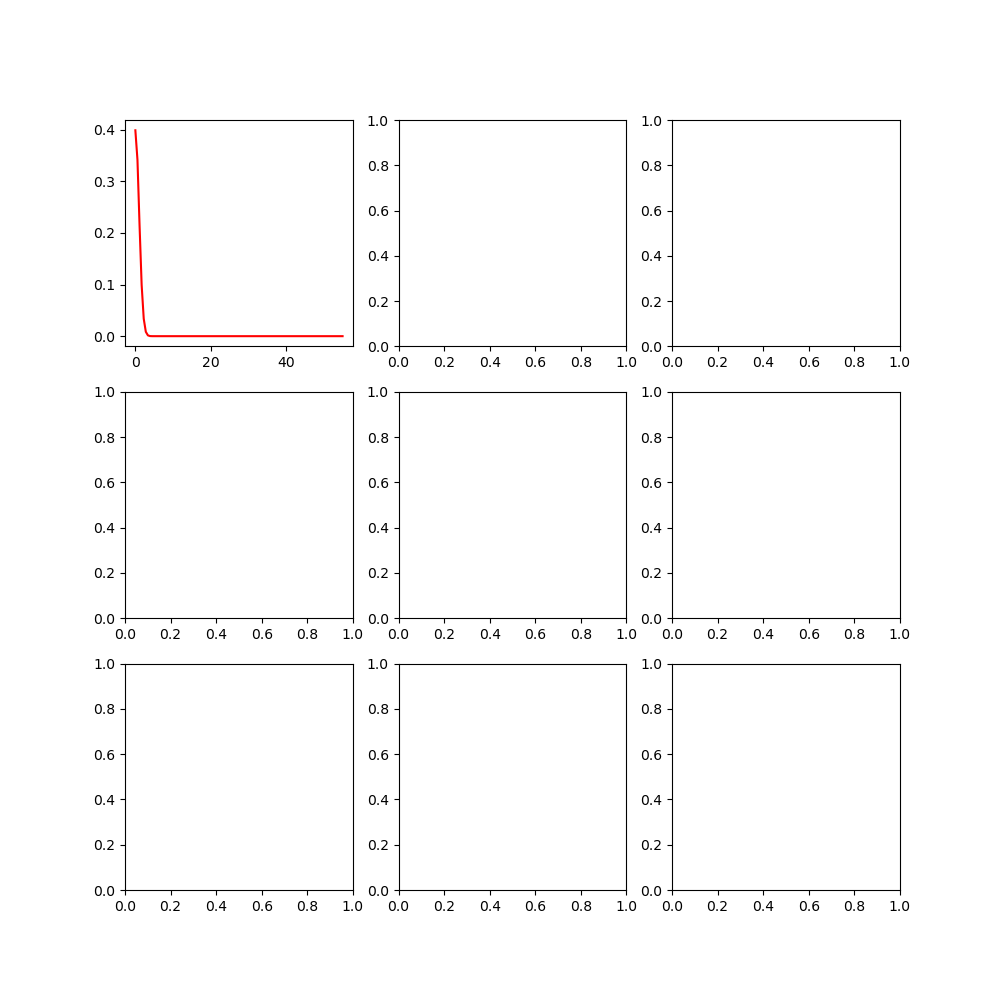

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [188]:
N1, N2 = 3, 3
N = N1 * N2
fig, axes = plt.subplots(nrows=N1, ncols=N2, figsize=(10,10))

distrib = [None] * (N+2)
distrib[1] = np.array([1/6]*6)

for i in range(2, N + 2):
    distrib[i] = np.convolve(distrib[i-1], distrib[1])
    
    x = [np.sqrt(2**i)*(i-3/2)/(np.sqrt(35/12)) for i in range(2**i)]
    x = list(range(len(distrib[i])))
    y = list(distrib[i])
    
    rv = stats.norm(3/2, np.sqrt(35/12/n))
    
    xn = np.linspace(0, 6*N+1, 100)
    
    axes[(i-2) // N1, (i-2) % N2].plot(xn, rv.pdf(xn) , color = 'red')
    axes[(i-2) // N1, (i-2) % N2].bar(x,y, color = 'black')
    axes[(i-2) // N1, (i-2) % N2].set_title(f'n = {i}')

## Bibliografija

[1] https://towardsdatascience.com/matplotlib-animations-in-jupyter-notebook-4422e4f0e389

[2] https://www.geeksforgeeks.org/matplotlib-animate-multiple-lines/

[3] https://numpy.org/doc/stable/reference/generated/numpy.convolve.html

[4] https://docs.python.org/3/library/statistics.html#statistics.NormalDist.pdf